# Exploratory data analysis
We are going to take a look at a corpus composed of tweets about a number of American airlines. This dataset has a lot of interesting metadata that we can use for a deeper analysis, such as a sentiment score and reasons for a negative sentiment.

### Package installation and importation

First let's install and import the necessary packages for this notebook. There are three new packages that will be introduced in this notebook.

1.   `wordcloud`: package to generate word clouds from texts (http://amueller.github.io/word_cloud/references.html)
2.   `matplotlib`: package for creating visualizations (already pre-installed in Google Colaboratory (https://matplotlib.org/)
3.   `seaborn`: package for creating *prettier* statistical visualizations (https://seaborn.pydata.org/)

In [2]:
!pip install nltk
!pip install seaborn
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Ignore some warnings from being printed out
import warnings

warnings.filterwarnings('ignore')

In importing the NLTK module, we also instantiate two things necessary for cleaning our texts:

1.   `stopwords`: list of words that occur frequently in the English language but rarely add insight to analyses (e.g., *the*, *is*, *from*)
2.   `lemmatizer`: object for converting words to their lemma or root (i.e., *changing* to *change*)



In [4]:
# Instatiate NLTK module
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/vscode/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then, we import and configure other necessary packages.

In [5]:
# Set up visualization configurations
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.style as style

# style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': (12, 6)})

In [6]:
# Import other necessary packages
import pandas as pd

Lastly, we connect this notebook to Google Drive.

Make sure to add this file to your GDrive: https://drive.google.com/file/d/1g652VWhU4YATyC3dAUY6vHFP1cNRddKu/view?usp=sharing

In [8]:
try:
  # Google Colab
  from google.colab import drive
  drive.mount('/content/drive')

  # Instantiate location and name of file to be analyzed
  # Update this path XOXOXO
  file_name = '/content/drive/My Drive/Social Computing/02 Text Analysis/airline_tweets.csv'
except:
  file_name = 'airline_tweets.csv'

### Getting to Know the Data

The first step in any data analysis pipeline is to understand what the data is and how it is structured. So let's get a preview of our dataset.

In [9]:
tweets = pd.read_csv(file_name)
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Now, let's check further details about our tweet dataset.

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### Pre-processing and Cleaning

Before proceeding with any analysis, it would be best to start by cleaning and pre-processing the data to ensure its quality and the quality of resulting analyses.

We start by converting the data under the 'tweets_created' column to date data types. Presently, this data is in a string format.

In [11]:
type(tweets.loc[0, 'tweet_created'])

str

In [12]:
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created']).dt.date
type(tweets.loc[0, 'tweet_created'])

datetime.date

Next, we clean the texts under the 'text' column so that when we generate a word cloud analysis based on these later, we actually get a menaingful visualization.

In [13]:
# Add the airline names to the list of stopwords
additional_stopwords = tweets['airline'].unique()
stopwords.extend(additional_stopwords)

In [21]:
from nltk.stem import PorterStemmer
text = 'before'

# Lemmatization went --> go (pos='v')
print(' '.join(
  [lemmatizer.lemmatize(word, pos='v') for word in str(text).split()]
))

# Stemming went --> went
stemmer = PorterStemmer()
print(' '.join(
  [stemmer.stem(word) for word in str(text).split()]
))

before
befor


In [ ]:
def clean_tweets(tweets):
  # Transform into lowercase
  tweets['cleaned_text'] = tweets['text'].str.lower()

  # Remove usernames, non-alphanumeric characters, and links
  tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'(@[A-Za-z0-9_]+)|([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '')

  # Remove stopwords
  tweets['cleaned_text'] = tweets['cleaned_text'].apply(
    lambda row: ' '.join([word for word in row.split() if word not in (stopwords)]))

  # Lemmatize verbs
  tweets['cleaned_text'] = tweets['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'v') for x in row.split()]))

  # Lemmatize adjectives
  tweets['cleaned_text'] = tweets['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'a') for x in row.split()]))

  # Lemmatize nouns
  tweets['cleaned_text'] = tweets['cleaned_text'].apply(
    lambda row: ' '.join([lemmatizer.lemmatize(x, 'n') for x in row.split()]))

  # Remove trailing and leading whitespaces
  tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'^\s+|\s+$', '')

  return tweets

In [23]:
cleaned_tweets = clean_tweets(tweets)
cleaned_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada),@virginamerica @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica plus add commercial experience....
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada),@virginamerica today... must mean need take an...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really aggressive blast obnoxio...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really big bad thing


In [28]:
cleaned_tweets.loc[[10], ['text', 'cleaned_text']].values

array([['@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
        '@virginamerica know suicide second lead cause death among teen 10-24']],
      dtype=object)

### Analysis of tweets

##### Counts and Percentages

The simplest analysis that can be done is to examine how many or what percentages of tweets pertain to a particular airline, sentiment, or sentiment reason.

Let's try to analye the percentage of tweets for each airline first. Here the `value_counts` method counts the number of times a particular string appears in the `airline` column. The `normalize=True` argument tells that the output shouldn't just be raw numbers but should be percentages instead (i.e., they add up to 100%).

In [29]:
tweets['airline'].value_counts(normalize=True)

airline
United            0.261066
US Airways        0.198975
American          0.188456
Southwest         0.165301
Delta             0.151776
Virgin America    0.034426
Name: proportion, dtype: float64

Now that we know the percentages for each airline, let's explore this information in another way: by visualizing the raw counts of tweets for each airline.

<Axes: xlabel='airline', ylabel='count'>

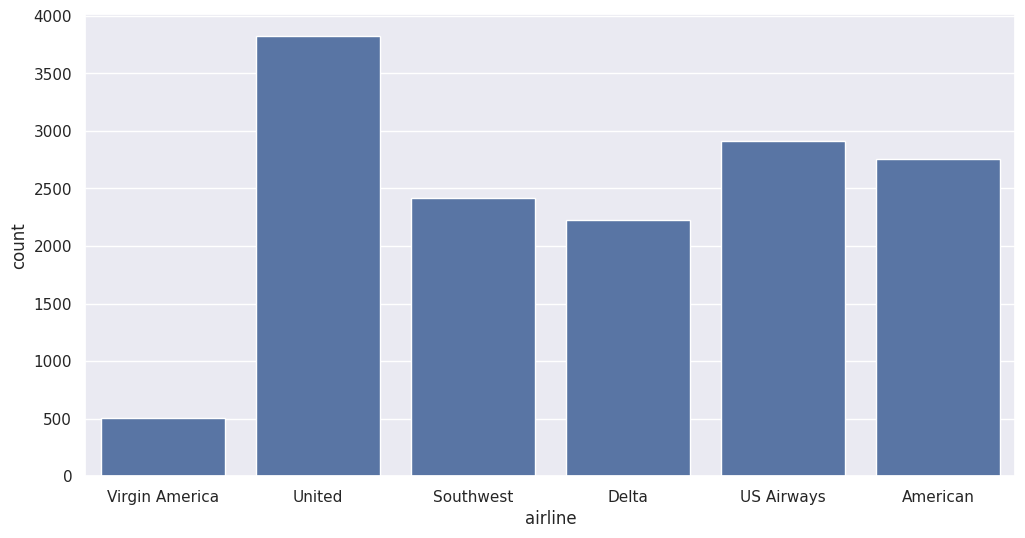

In [30]:
sns.countplot(data=tweets, x='airline')

We can repeat this process for both the `airline_sentiment` and `negativereason` columns.

airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64


<Axes: xlabel='airline_sentiment', ylabel='count'>

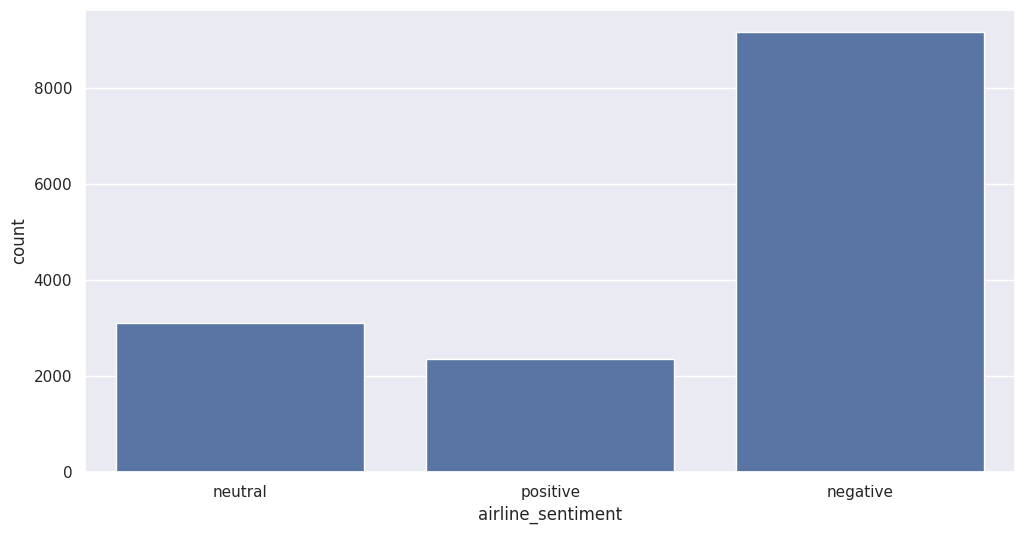

In [31]:
print(tweets['airline_sentiment'].value_counts(normalize=True))
sns.countplot(data=tweets, x='airline_sentiment')

negativereason
Customer Service Issue         0.317063
Late Flight                    0.181412
Can't Tell                     0.129658
Cancelled Flight               0.092286
Lost Luggage                   0.078884
Bad Flight                     0.063195
Flight Booking Problems        0.057638
Flight Attendant Complaints    0.052408
Long Lines                     0.019394
Damaged Luggage                0.008063
Name: proportion, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'Long Lines')])

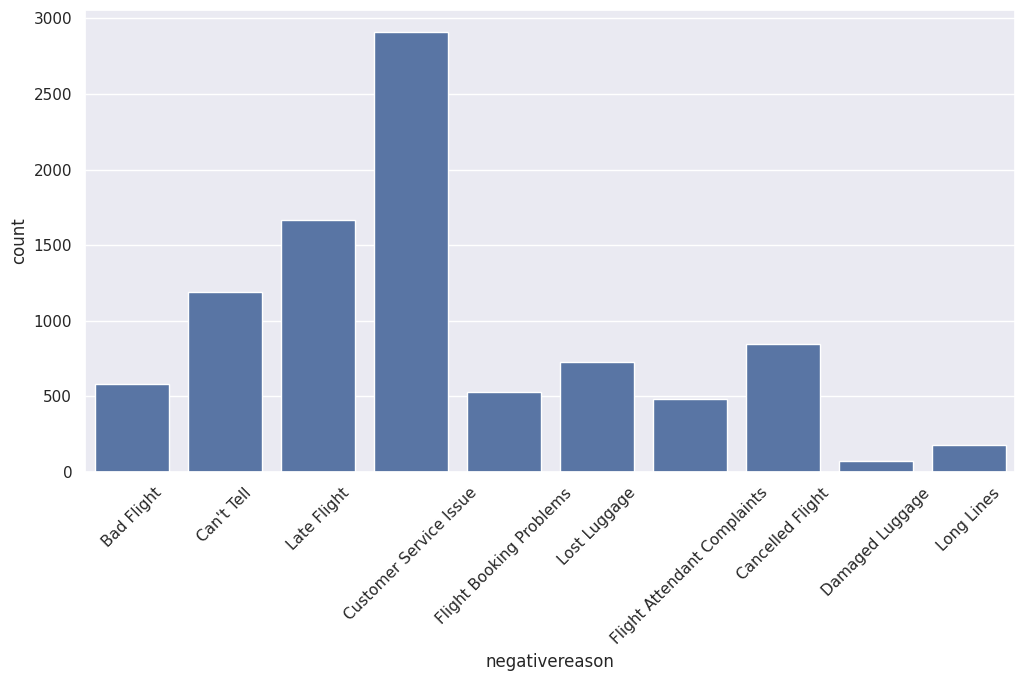

In [32]:
tweets['negativereason'] = tweets['negativereason'].replace('longlines', 'Long Lines')
print(tweets['negativereason'].value_counts(normalize=True))
plot = sns.countplot(data=tweets, x='negativereason')
plt.xticks(rotation=45)

##### Sentiments across Time

Now, let's take a look at how tweet sentiments changed across time. To do that, we would like to concern ourselves only with the `tweet_created` and `airline_sentiment` columns.

In [33]:
x = tweets[['tweet_created', 'airline_sentiment']]
x.head(5)

,tweet_created,airline_sentiment
0,2015-02-24,neutral
1,2015-02-24,positive
2,2015-02-24,neutral
3,2015-02-24,negative
4,2015-02-24,negative


Then, we'd like to group the tweets by the date they were created and count the instances of positive, negative, and neutral tweets for each date.

In [34]:
x = x.groupby('tweet_created').value_counts().reset_index()
x

,tweet_created,airline_sentiment,count
0,2015-02-16,negative,3
1,2015-02-16,neutral,1
2,2015-02-17,negative,838
3,2015-02-17,neutral,297
4,2015-02-17,positive,273
5,2015-02-18,negative,736
6,2015-02-18,neutral,335
7,2015-02-18,positive,273
8,2015-02-19,negative,751
9,2015-02-19,neutral,329


Afterwards, we reformat the dataframe such that the sentiment categories appear as column headers. This makes the analysis more easily readable to human eyes.

In [35]:
x = x.pivot(index='tweet_created', columns='airline_sentiment')
x

count                 
airline_sentiment negative neutral positive
tweet_created                              
2015-02-16             3.0     1.0      NaN
2015-02-17           838.0   297.0    273.0
2015-02-18           736.0   335.0    273.0
2015-02-19           751.0   329.0    296.0
2015-02-20           835.0   383.0    282.0
2015-02-21          1049.0   278.0    230.0
2015-02-22          2266.0   463.0    350.0
2015-02-23          1919.0   676.0    433.0
2015-02-24           781.0   337.0    226.0

Finally, we plot the dataframe into a line chart.

<Axes: xlabel='tweet_created'>

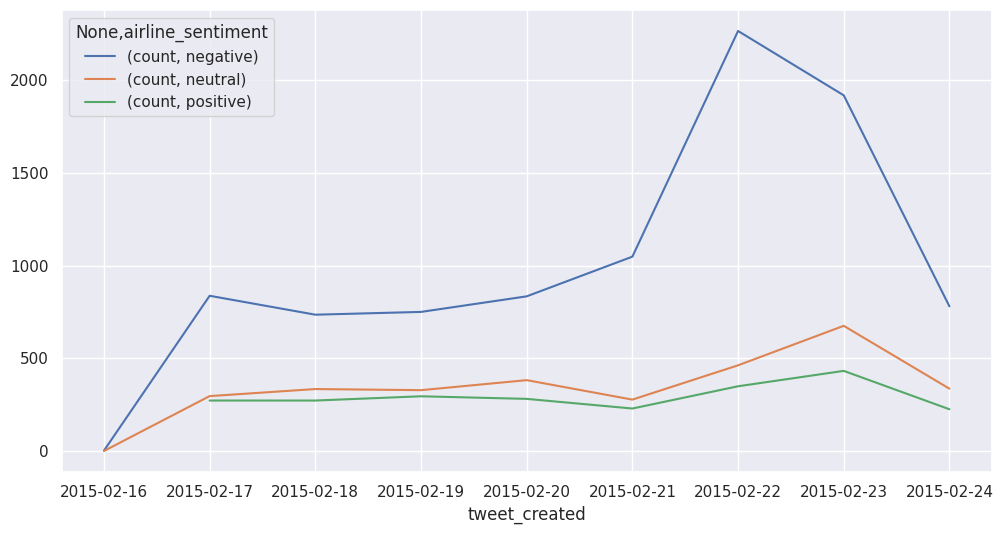

In [36]:
x.plot()

Alternatively, we can just combine all these steps with two lines of code.

<Axes: xlabel='tweet_created'>

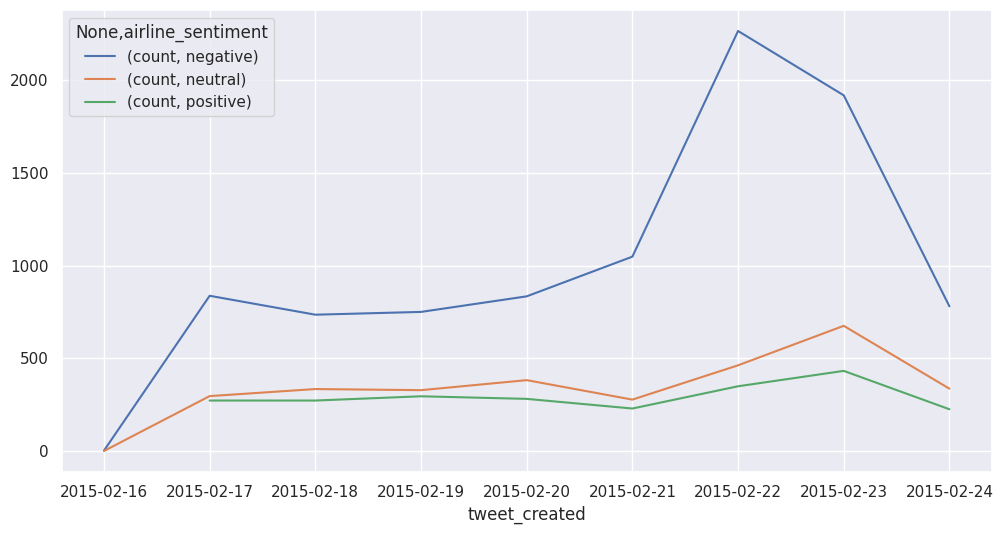

In [37]:
x = tweets[['tweet_created', 'airline_sentiment']].groupby('tweet_created').value_counts().reset_index()
x.pivot(index='tweet_created', columns='airline_sentiment').plot()

##### Explorartory Bivariate Analysis

Let's look at how we can do exploratory analyses involving two variables. Say we want to find out what percentages of tweets pertaining to each airline are positive, negative, and neutral.

The easiest way to do this is to generate a histogram with the `fill` argument.

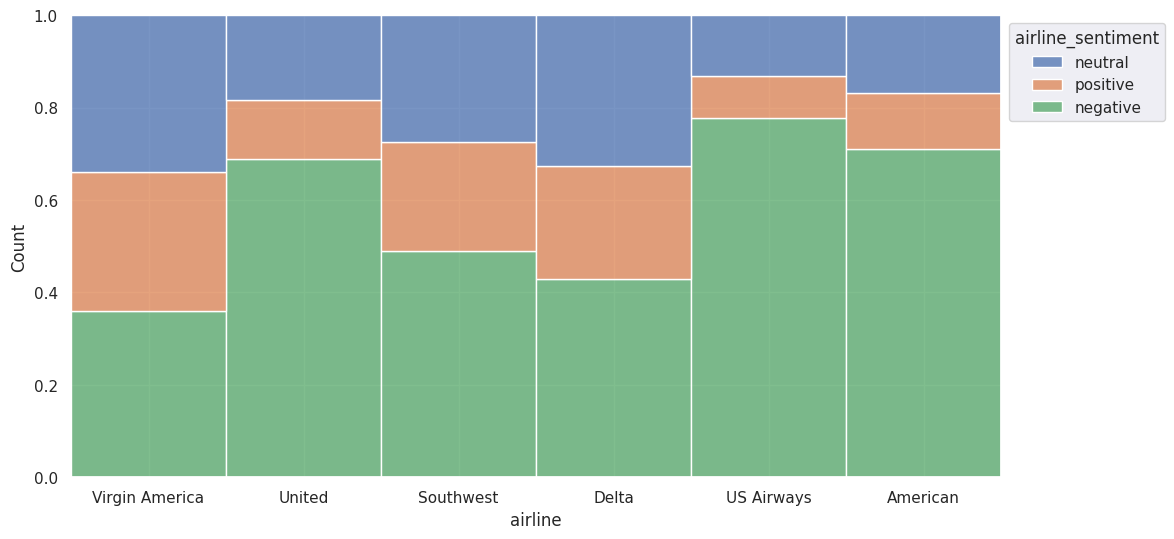

In [38]:
ax = sns.histplot(data=tweets, x='airline', hue='airline_sentiment', multiple='fill')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Now, our problem is that we have no way of knowing the specific percentage number each block refers to. To get these, we need to again play around with our dataframe and the `value_counts` and `groupby` methods.

First, we use the `groupby` and `value_counts` methods to get how many tweets pertaining to each airline are positive, negative, and neutral.

In [39]:
airline_and_sentiment = tweets[['airline', 'airline_sentiment']].groupby('airline').value_counts().reset_index()
airline_and_sentiment

,airline,airline_sentiment,count
0,American,negative,1960
1,American,neutral,463
2,American,positive,336
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


Next, we get the total number of tweets for each airline.

In [40]:
airline_counts = tweets['airline'].value_counts().reset_index()
airline_counts

,airline,count
0,United,3822
1,US Airways,2913
2,American,2759
3,Southwest,2420
4,Delta,2222
5,Virgin America,504


Then, we join these two dataframes together using the `airline` column.

In [41]:
joined = airline_and_sentiment.merge(airline_counts, on='airline')
joined

,airline,airline_sentiment,count_x,count_y
0,American,negative,1960,2759
1,American,neutral,463,2759
2,American,positive,336,2759
3,Delta,negative,955,2222
4,Delta,neutral,723,2222
5,Delta,positive,544,2222
6,Southwest,negative,1186,2420
7,Southwest,neutral,664,2420
8,Southwest,positive,570,2420
9,US Airways,negative,2263,2913


Now, we can get the relevant percentages by simply dividing the sentiment counts by the airline counts. These percentages now correspond to the blocks in our visualization.

In [42]:
joined['percentage'] = joined['count_x'] / joined['count_y']
joined

,airline,airline_sentiment,count_x,count_y,percentage
0,American,negative,1960,2759,0.710402
1,American,neutral,463,2759,0.167814
2,American,positive,336,2759,0.121783
3,Delta,negative,955,2222,0.429793
4,Delta,neutral,723,2222,0.325383
5,Delta,positive,544,2222,0.244824
6,Southwest,negative,1186,2420,0.490083
7,Southwest,neutral,664,2420,0.274380
8,Southwest,positive,570,2420,0.235537
9,US Airways,negative,2263,2913,0.776862


We can now combine all these to define a function that allows us to both calculate and visualize percentages across two variables.

In [43]:
def visualize_percentages(df, x, hue):
  tweets_groupby1 = tweets[[x, hue]].groupby(x).value_counts().reset_index()
  tweets_groupby2 = tweets[x].value_counts().reset_index()
  tweets_grouped = tweets_groupby1.merge(tweets_groupby2, on=x)
  tweets_grouped['percentage'] = tweets_grouped['count_x'] / tweets_grouped['count_y']
  print(tweets_grouped)
  ax = sns.histplot(data=tweets, x=x, hue=hue, multiple='fill')
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           airline airline_sentiment  count_x  count_y  percentage
0         American          negative     1960     2759    0.710402
1         American           neutral      463     2759    0.167814
2         American          positive      336     2759    0.121783
3            Delta          negative      955     2222    0.429793
4            Delta           neutral      723     2222    0.325383
5            Delta          positive      544     2222    0.244824
6        Southwest          negative     1186     2420    0.490083
7        Southwest           neutral      664     2420    0.274380
8        Southwest          positive      570     2420    0.235537
9       US Airways          negative     2263     2913    0.776862
10      US Airways           neutral      381     2913    0.130793
11      US Airways          positive      269     2913    0.092345
12          United          negative     2633     3822    0.688906
13          United           neutral      697     3822    0.18

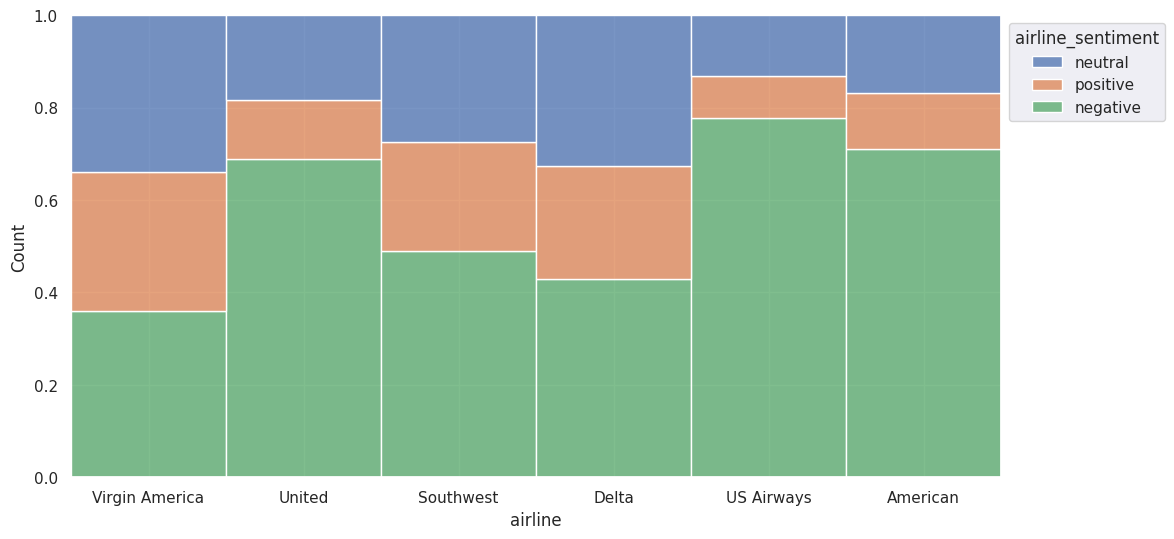

In [44]:
visualize_percentages(tweets, 'airline', 'airline_sentiment')

It appears that US Airways, American, and United airlines have the highest percentages for complaints; negative tweets comprise 68% or more or all of their respective tweets. Virgin America has the "healthiest" distribution of sentiments (almost an even split across all sentiment categories) and has the highest percentage of positive tweets overall.

           airline               negativereason  count_x  count_y  percentage
0         American       Customer Service Issue      768     2759    0.278362
1         American                  Late Flight      249     2759    0.090250
2         American             Cancelled Flight      246     2759    0.089163
3         American                   Can't Tell      198     2759    0.071765
4         American                 Lost Luggage      149     2759    0.054005
5         American      Flight Booking Problems      130     2759    0.047119
6         American                   Bad Flight       87     2759    0.031533
7         American  Flight Attendant Complaints       87     2759    0.031533
8         American                   Long Lines       34     2759    0.012323
9         American              Damaged Luggage       12     2759    0.004349
10           Delta                  Late Flight      269     2222    0.121062
11           Delta       Customer Service Issue      199     222

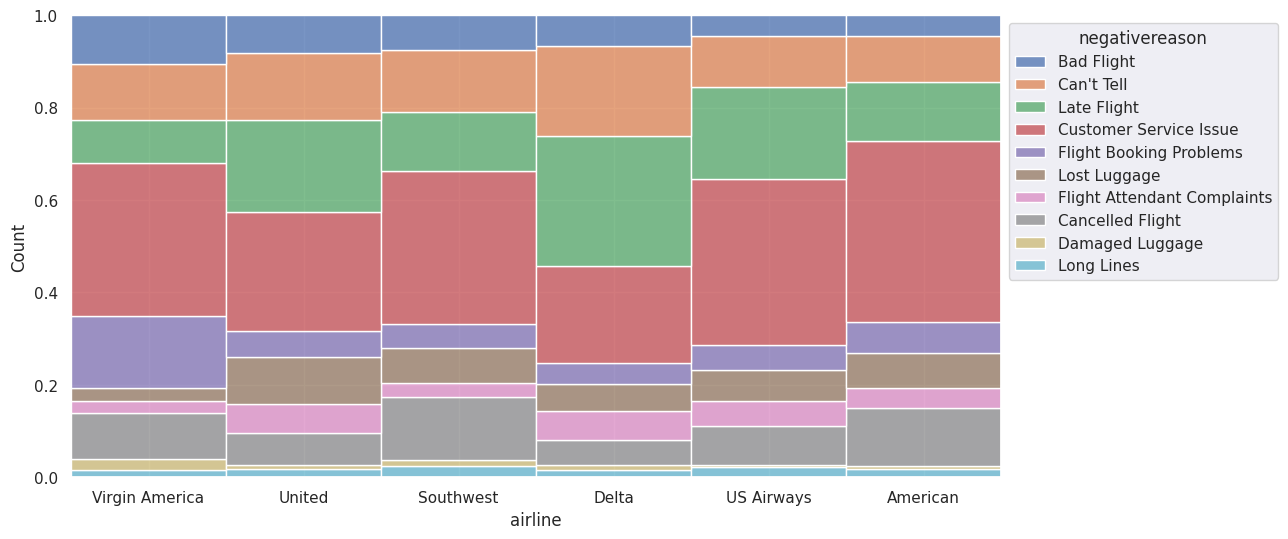

In [45]:
visualize_percentages(tweets, 'airline', 'negativereason')

While most airlines have their fairshare of customer service issues, it can be noticed that Delta has the highest percentage of late flight issues (27%).

##### Word Cloud Analysis

Let's create a word cloud from the tweets. First, let's transform the tweet texts so that it can be used to generate a word cloud.

In [46]:
tweets_cleaned = tweets['cleaned_text']

# Remove null values
tweets_cleaned = tweets.dropna()

# Join all tweets as one piece of string
tweets_cleaned = ' '.join(tweets)

# Replace all spaces with commas
tweets_cleaned = tweets.replace(' ', ',')

tweets_cleaned

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada),@virginamerica @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica plus add commercial experience....
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada),@virginamerica today... must mean need take an...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really aggressive blast obnoxio...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22,NaN,NaN,@americanair thank get different flight chicago.
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22,Texas,NaN,@americanair leave 20 minute late flight. warn...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22,"Nigeria,lagos",NaN,@americanair please bring american airline #bl...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22,New Jersey,Eastern Time (US & Canada),"@americanair money, change flight, answer phon..."


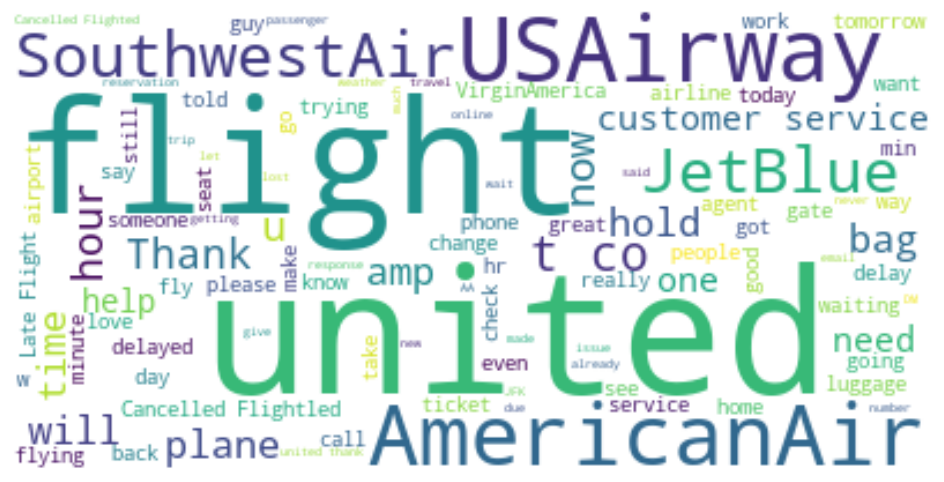

In [47]:
wc = WordCloud(background_color="white",
               # colormap='plasma',
               max_words=100
               )

wc.generate(" ".join(tweet for tweet in tweets_cleaned.text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

##### Term Frequency-Based Analysis

Word clouds are one way of visualizing which terms appear most frequently in a textual dataset. Another approach is to generate bar charts visualizing raw counts of words in the dataset. For this part of the notebook, we'll see how we can create a function that creates both bar charts and word clouds to help us make analyses based on term frequencies.

First, we import the `CountVectorizer` module from the `scikit-learn` (here abbreviated as `sklearn`) package.

1.   `scikit-learn`: library of machine learning algorithms; helps automate a lot of the complex and tedious mathematical calculations involved in machine learning (https://scikit-learn.org/stable/)
2.   `CountVectorizer`: converts text documents into a matrix of term frequency counts (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)



In [48]:
from sklearn.feature_extraction.text import CountVectorizer

Next, we create a sample corpus on which we will use `CountVectorizer` to understand how this particular module works.

In [49]:
sample_corpus = [
  'Masarap ang pinitas na mansanas ni Juan.',
  'Hindi masarap iyong mansanas na dala ni Juana.',
  'Ano ang lasa ng mansanas na nabili ko?',
  'Sino ang pumitas ng mansanas, si Juan o si Juana?'
]

We now initialize a `vectorizer` object that will skip over counting the stop words (as dictated by the `stopwords=stopwords`argument) and that will only count the frequency of the 2,000 most frequent words (as dictated by the `max_features=2000` argument).

We then fit (i.e., apply) this `vectorizer` object on our sample corpus, and this object then transforms the corpus into a matrix, which we store in the `matrix` variable.

In [50]:
vectorizer = CountVectorizer(stop_words=stopwords, max_features=2000)
matrix = vectorizer.fit_transform(sample_corpus)

To view the matrix, we convert it to an array. The array has 4 rows. Each row in matrices produced by `CountVectorizer` corresponds to a textual entry in the corpus.

In [51]:
matrix.toarray()

array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1]])

Meanwhile, each column corresponds to a word in the corpus. To find out what word corresponds to each column, we use the `get_feature_names_out` method of our `vectorizer` object. In the output, the first word corresponds to the first column of the matrix; the second word to the second column; etc.

In [52]:
vectorizer.get_feature_names_out()

array(['ang', 'ano', 'dala', 'hindi', 'iyong', 'juan', 'juana', 'ko',
       'lasa', 'mansanas', 'masarap', 'na', 'nabili', 'ng', 'ni',
       'pinitas', 'pumitas', 'si', 'sino'], dtype=object)

We can also use the `sum` method to figure out how many words there are in each textual entry (summing across rows, `axis=1`) or how many times a particular word occurs (summing across columns, `axis=0`).

In [53]:
matrix.sum(axis=1)

matrix([[7],
        [8],
        [8],
        [9]])

In [54]:
matrix.sum(axis=0)

matrix([[3, 1, 1, 1, 1, 2, 2, 1, 1, 4, 2, 3, 1, 2, 2, 1, 1, 2, 1]])

Now, we need to figure out a way to match the term frequency counts with their corresponding terms. To do this, we need to know what the index of each term is in the matrix.

The code below outputs the terms in the matrix and their corresponding indices.



In [55]:
vectorizer.vocabulary_.items()

dict_items([('masarap', np.int64(10)), ('ang', np.int64(0)), ('pinitas', np.int64(15)), ('na', np.int64(11)), ('mansanas', np.int64(9)), ('ni', np.int64(14)), ('juan', np.int64(5)), ('hindi', np.int64(3)), ('iyong', np.int64(4)), ('dala', np.int64(2)), ('juana', np.int64(6)), ('ano', np.int64(1)), ('lasa', np.int64(8)), ('ng', np.int64(13)), ('nabili', np.int64(12)), ('ko', np.int64(7)), ('sino', np.int64(18)), ('pumitas', np.int64(16)), ('si', np.int64(17))])

We can now loop through the list of tuples (data point pairs) above in order to match each term with its corresponding frequency from the summed matrix we showed above.

In [56]:
total_per_ngram = matrix.sum(axis=0)
frequency = [(w, total_per_ngram[0, i]) for w, i in vectorizer.vocabulary_.items()]
frequency

[('masarap', np.int64(2)),
 ('ang', np.int64(3)),
 ('pinitas', np.int64(1)),
 ('na', np.int64(3)),
 ('mansanas', np.int64(4)),
 ('ni', np.int64(2)),
 ('juan', np.int64(2)),
 ('hindi', np.int64(1)),
 ('iyong', np.int64(1)),
 ('dala', np.int64(1)),
 ('juana', np.int64(2)),
 ('ano', np.int64(1)),
 ('lasa', np.int64(1)),
 ('ng', np.int64(2)),
 ('nabili', np.int64(1)),
 ('ko', np.int64(1)),
 ('sino', np.int64(1)),
 ('pumitas', np.int64(1)),
 ('si', np.int64(2))]

We can then convert the resulting list to a dataframe and sort this dataframe by the frequency of the words.

In [57]:
frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
frequency

,term,frequency
0,masarap,2
1,ang,3
2,pinitas,1
3,na,3
4,mansanas,4
5,ni,2
6,juan,2
7,hindi,1
8,iyong,1
9,dala,1


In [58]:
frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
frequency

,term,frequency
0,mansanas,4
1,na,3
2,ang,3
3,juana,2
4,masarap,2
5,ni,2
6,juan,2
7,si,2
8,ng,2
9,pinitas,1


We can now create a bar chart visualizing the frequency of terms using this dataframe.

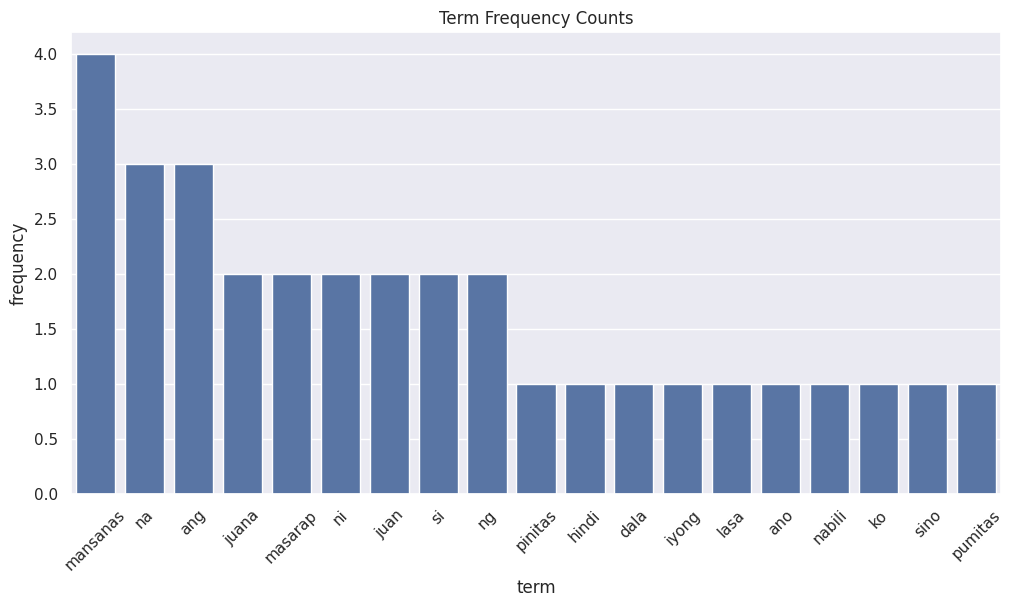

In [59]:
title = 'Term Frequency Counts'
ax = sns.barplot(data=frequency, x='term', y='frequency')
if title:
  ax.set_title(title)
plt.xticks(rotation=45)
plt.show()
plt.close()

Let's now define a function that combines everything we did by just taking in a `vectorizer` and a `matrix` as arguments and outputting a bar chart that visualizes term frequency.

In [60]:
def visualize_frequency(matrix, vectorizer, title=None):
  total = matrix.sum(axis=0)
  frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
  frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
  frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
  ax = sns.barplot(data=frequency.head(25), x='term', y='frequency')
  if title:
    ax.set_title(title)
  plt.xticks(rotation=45)
  plt.show()
  plt.close()

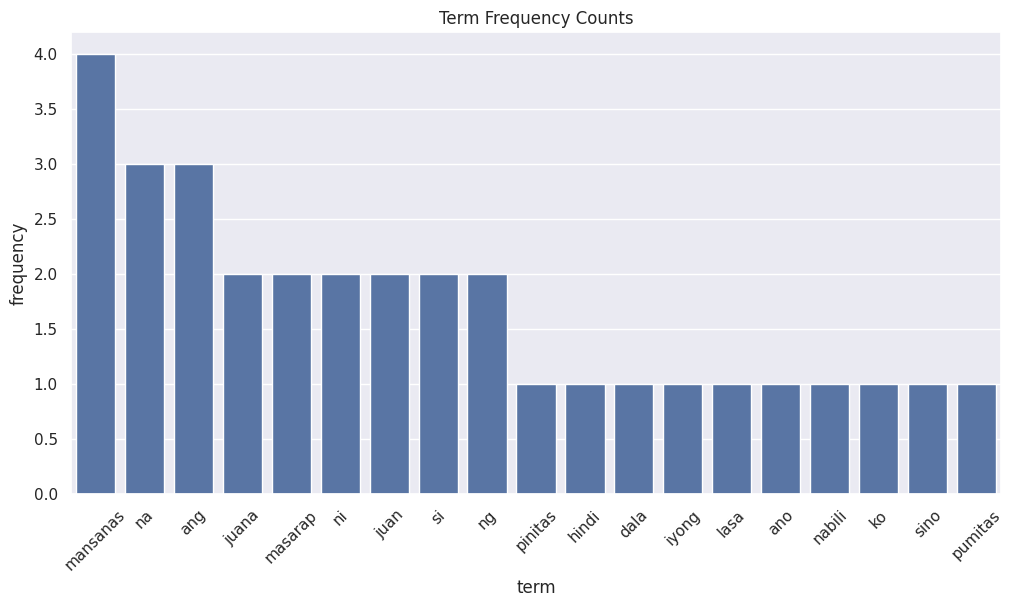

In [61]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

We can also configure `CountVectorizer` such that instead of counting individual words (unigrams), it counts pairs of words or bigrams. We just need to add the `ngram_range` argument and specify the length of the word combinations we want to be counted.

An n-gram is simply a collection of words. 1-gram is an individual word, 2-grams are pairs of words, 3-grams are trios of words.

In [62]:
vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(2, 2), max_features=2000)
matrix = vectorizer.fit_transform(sample_corpus)

In [63]:
matrix.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1]])

In [64]:
vectorizer.get_feature_names_out()

array(['ang lasa', 'ang pinitas', 'ang pumitas', 'ano ang', 'dala ni',
       'hindi masarap', 'iyong mansanas', 'juan si', 'lasa ng',
       'mansanas na', 'mansanas ni', 'mansanas si', 'masarap ang',
       'masarap iyong', 'na dala', 'na mansanas', 'na nabili',
       'nabili ko', 'ng mansanas', 'ni juan', 'ni juana', 'pinitas na',
       'pumitas ng', 'si juan', 'si juana', 'sino ang'], dtype=object)

In [65]:
matrix.sum(axis=0)

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
         1, 1, 1, 1, 1]])

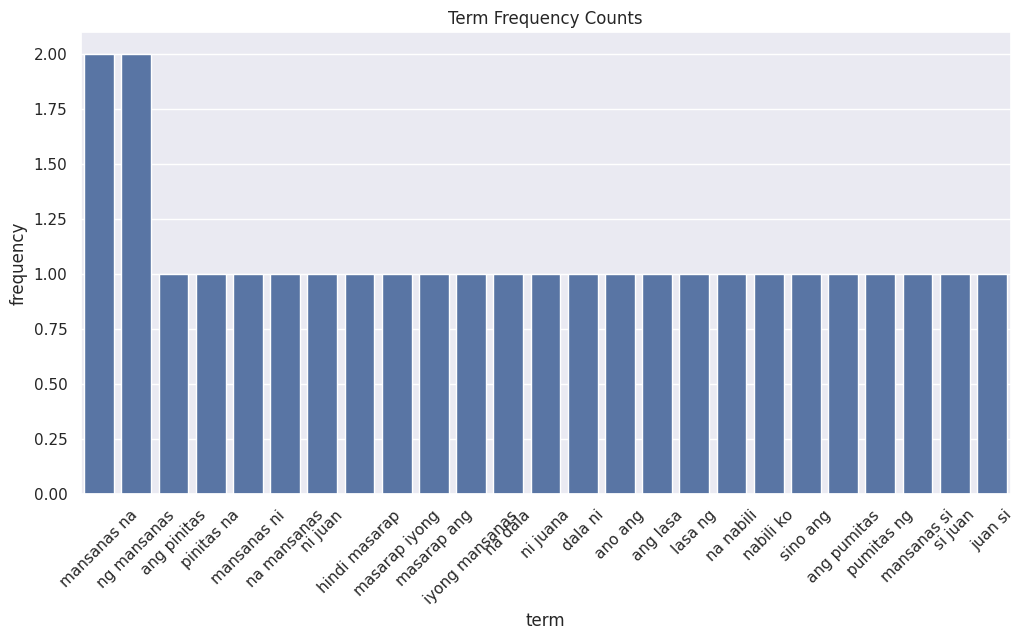

In [66]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

Let's now try visualizing word counts for our `tweets` dataset.

In [67]:
vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), max_features=2000)
matrix = vectorizer.fit_transform(tweets['cleaned_text'])

In [68]:
matrix.toarray().shape

(14640, 2000)

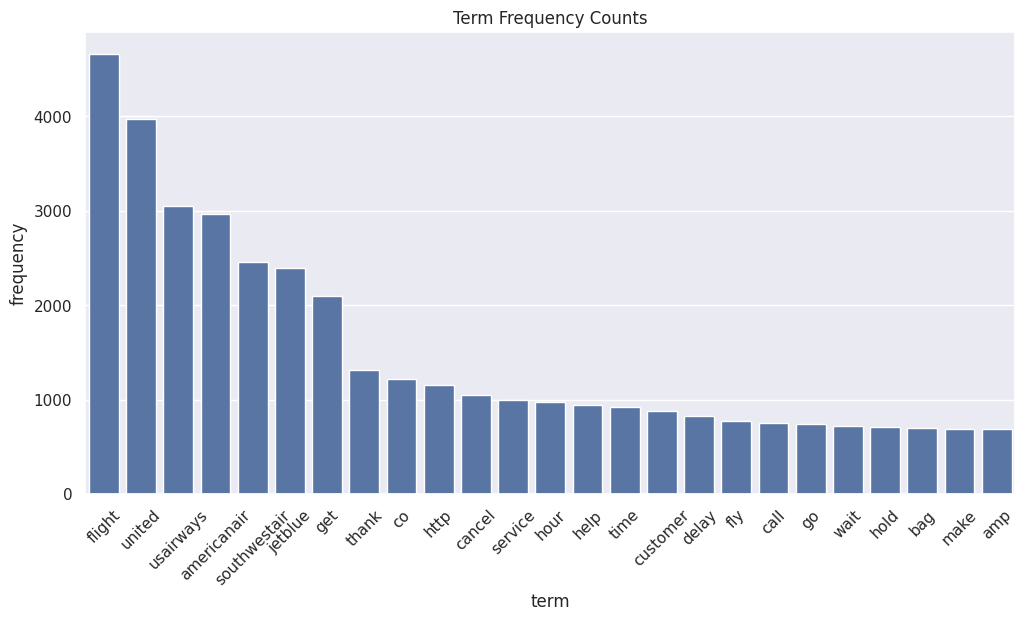

In [69]:
visualize_frequency(matrix, vectorizer, 'Term Frequency Counts')

Now that we can visualize term frequency bar charts, let's create a function that is able to output: (1) a word cloud, (2) a bar chart measuring unigram frequency, and (3) a bar chart measuring bigram frequency. This can help us automate the analysis of prevailing themes within our dataset.

First, let's combine everything that we did in the Word Cloud Analysis section into one neat function.

In [70]:
def create_wordcloud(tweets, max_words=100, title=None):
  """Create a wordcloud of most common words in a set of tweets"""

  # Transform text for WordCloud
  tweets = tweets['cleaned_text']
  tweets = tweets.dropna()
  tweets = ' '.join(tweets)
  tweets = tweets.replace(' ', ',')

  # Generate wordcloud image
  wc = WordCloud(
      background_color="white",
      # colormap='plasma',
      max_words=max_words
  )
  wc.generate(tweets)
  plt.imshow(wc, interpolation='bilinear')
  if title:
    plt.title(title, size=30)
  plt.axis("off")
  plt.show()
  plt.close()

Then, let's create a function that takes a dataframe as an argument in addition to the optional arguments of specifying an airline, a sentiment, or a negative reason.

What this function essentially does is
1.   filter through the dataset based on the arguments given
2.   generate vectorizers and matrices that count unigram and bigram frequency in the filtered dataset
3.   generate visualization based on the text dataset, the vectorizers, and the matrices

In [71]:
def visualize_tweets(df, airline=None, airline_sentiment=None, negativereason=None):
  if airline:
    df = df[df['airline'] == airline]
  if airline_sentiment:
    df = df[df['airline_sentiment'] == airline_sentiment]
  if negativereason:
    df = df[df['negativereason'] == negativereason]
  vectorizer_1gram = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), max_features=2000)
  matrix_1gram = vectorizer_1gram.fit_transform(df['cleaned_text'])
  vectorizer_2gram = CountVectorizer(stop_words=stopwords, ngram_range=(2, 2), max_features=2000)
  matrix_2gram = vectorizer_2gram.fit_transform(df['cleaned_text'])

  if airline:
    create_wordcloud(df, title='{} Airlines'.format(airline))
    visualize_frequency(matrix_1gram, vectorizer_1gram, title='Term frequency for {} Airlines'.format(airline))
    visualize_frequency(matrix_2gram, vectorizer_2gram, title='Term frequency for {} Airlines'.format(airline))
  else:
    create_wordcloud(df)
    visualize_frequency(matrix_1gram, vectorizer_1gram)
    visualize_frequency(matrix_2gram, vectorizer_2gram)

Let's try applying the function on different analyses.

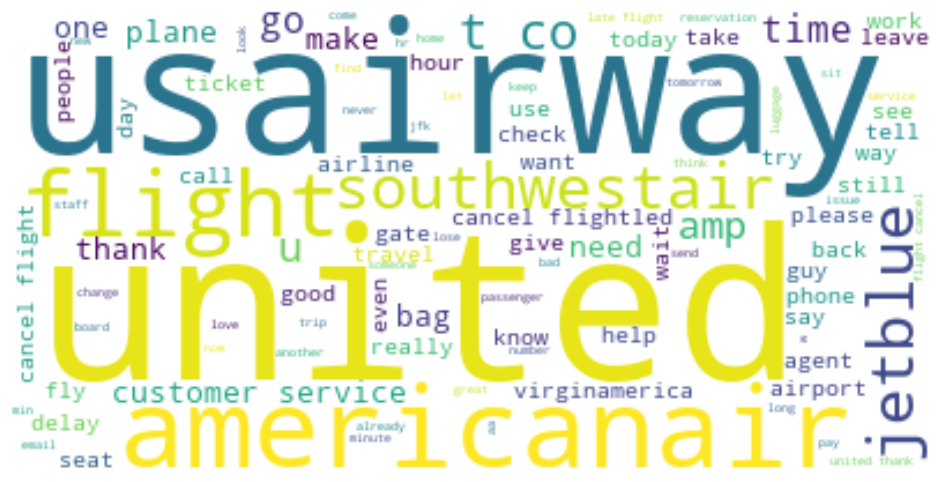

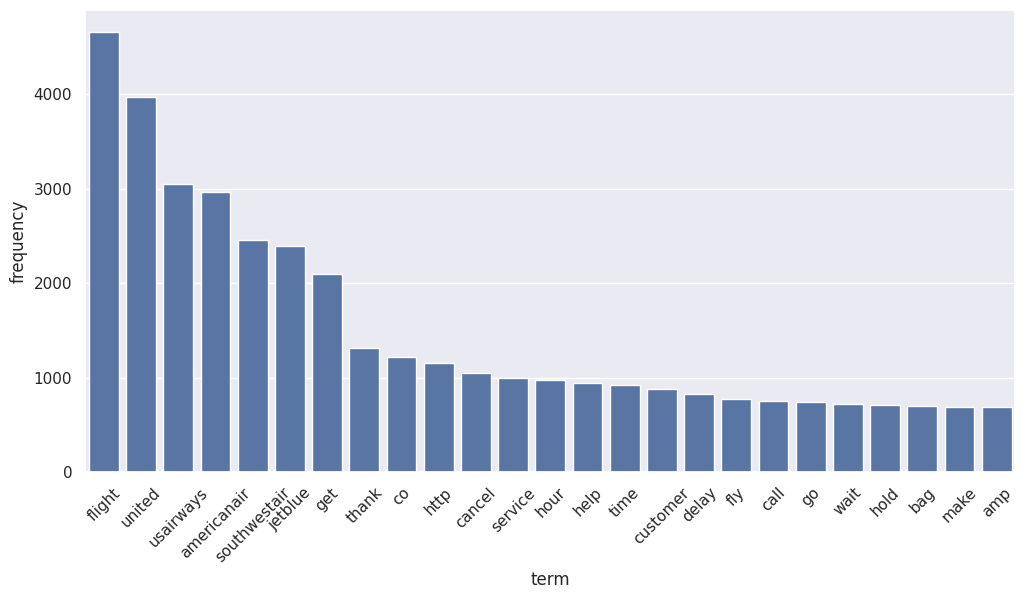

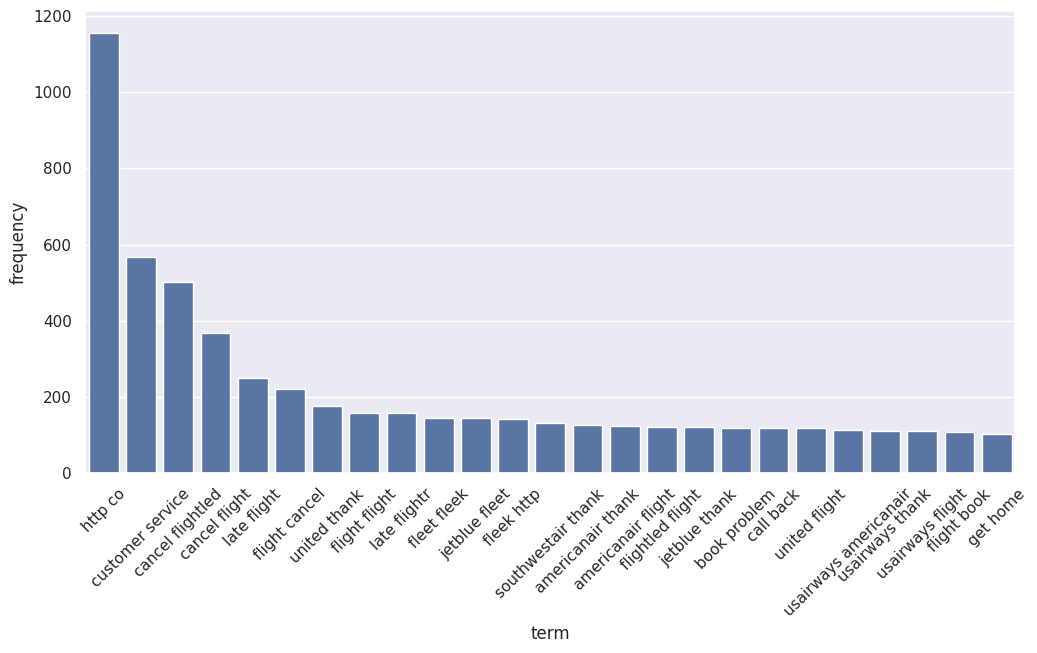

In [72]:
visualize_tweets(cleaned_tweets)

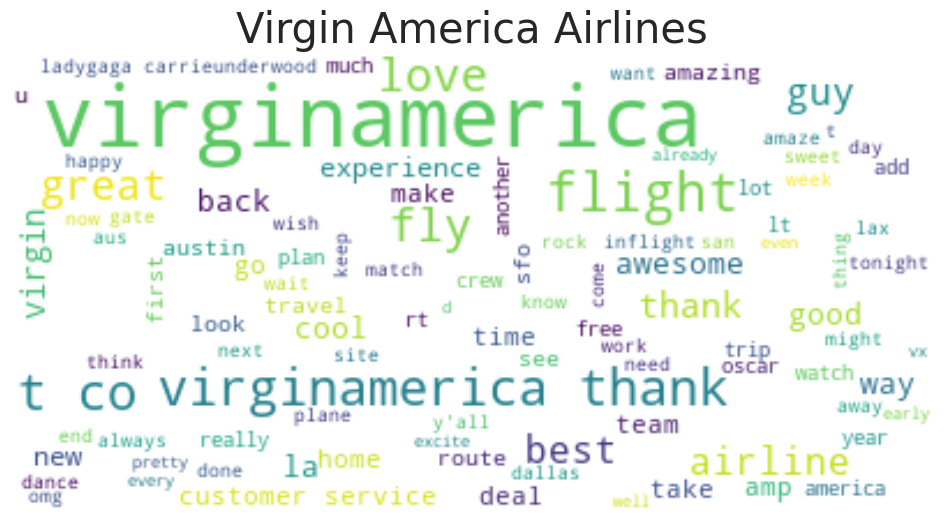

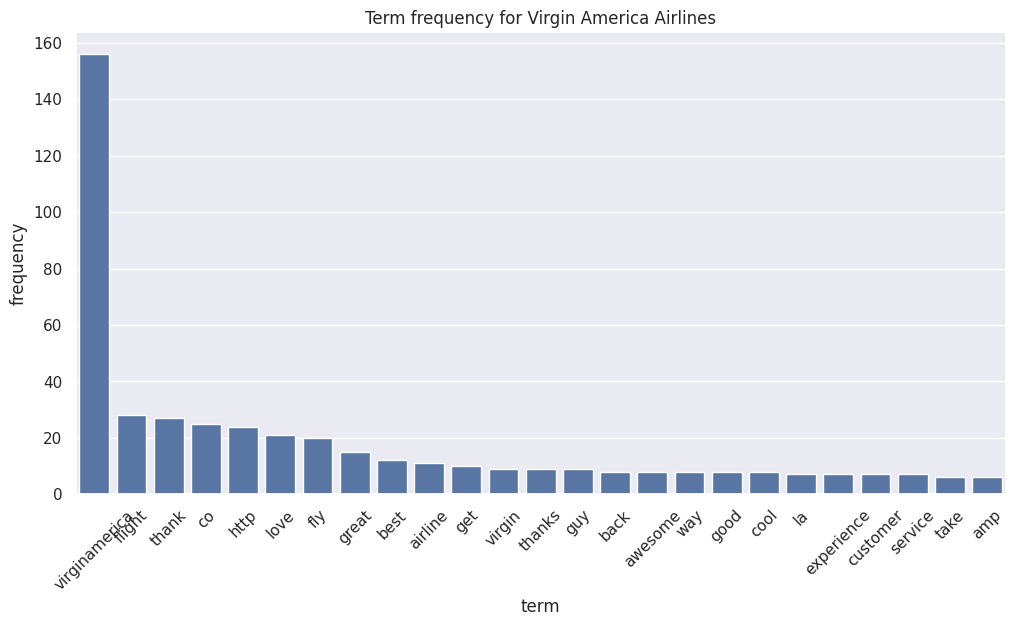

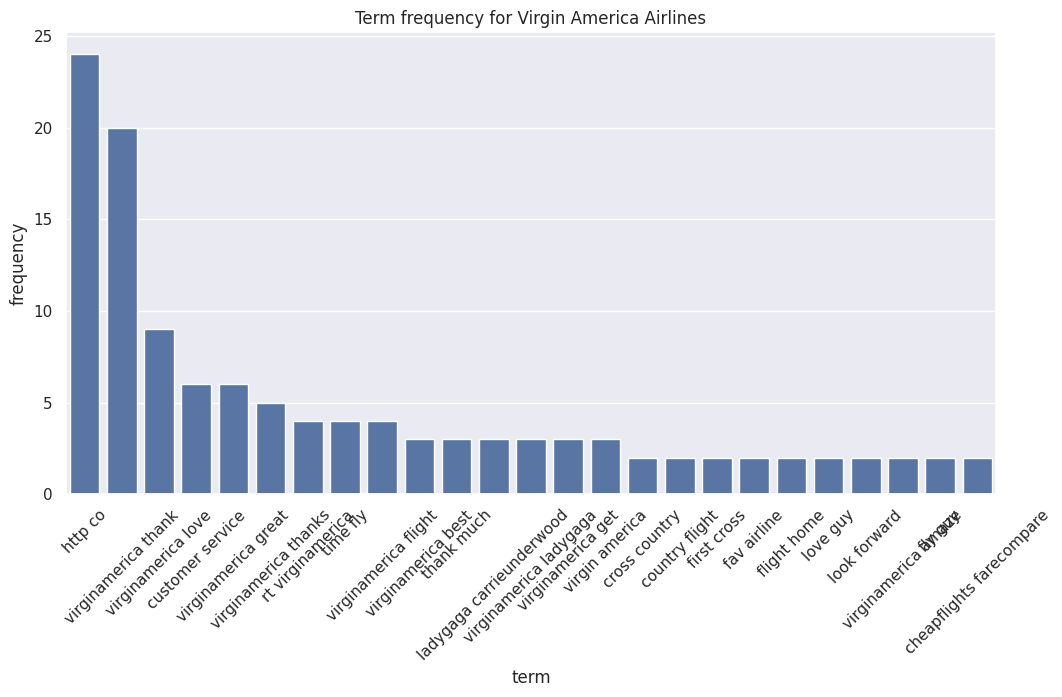

In [73]:
visualize_tweets(cleaned_tweets, airline='Virgin America', airline_sentiment='positive')

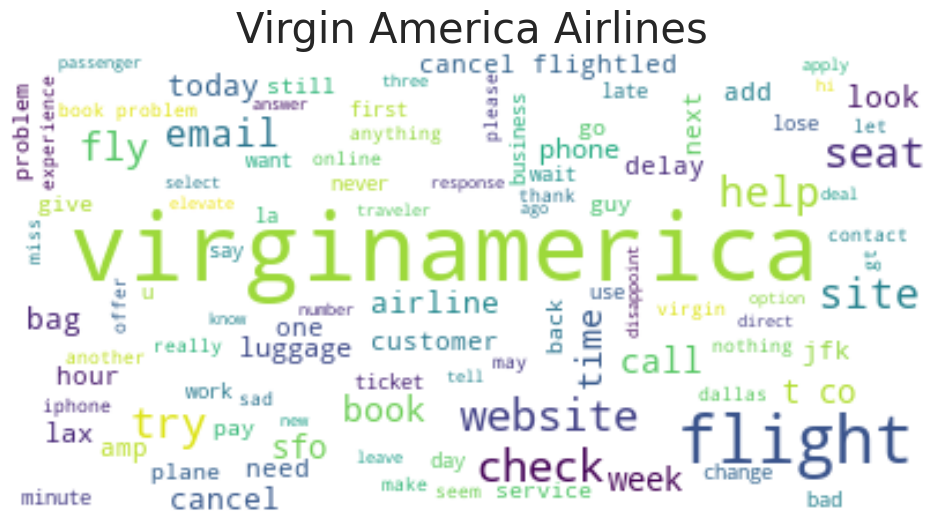

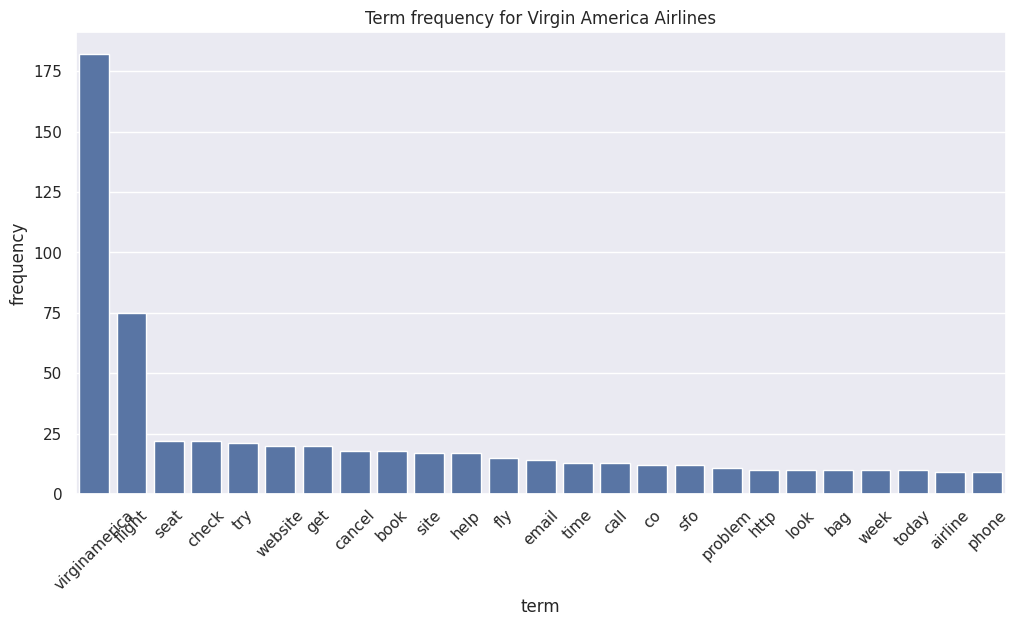

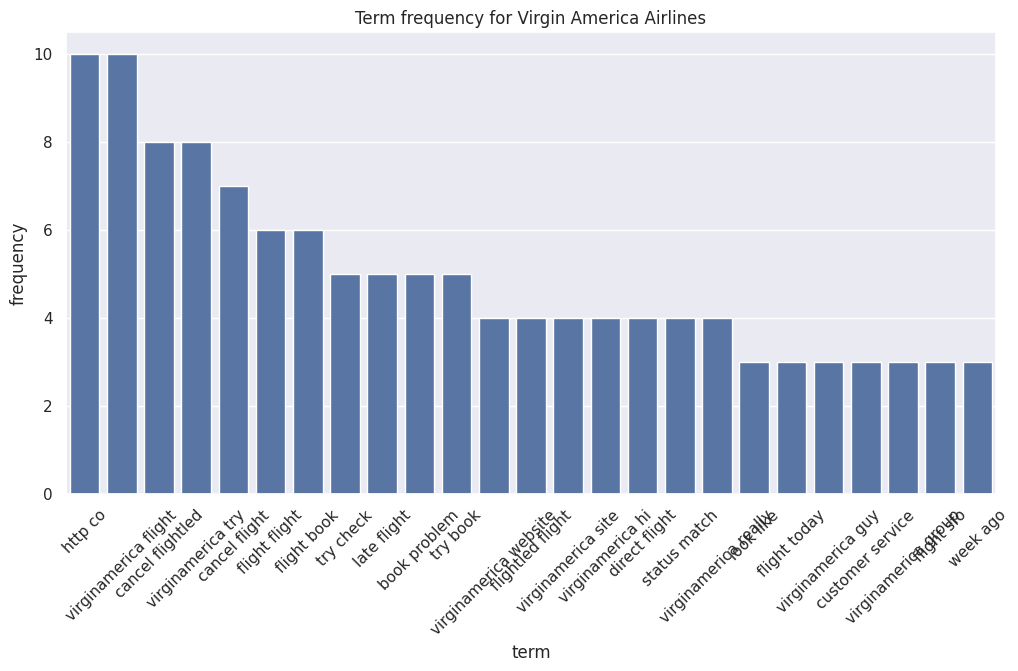

In [74]:
visualize_tweets(cleaned_tweets, airline='Virgin America', airline_sentiment='negative')

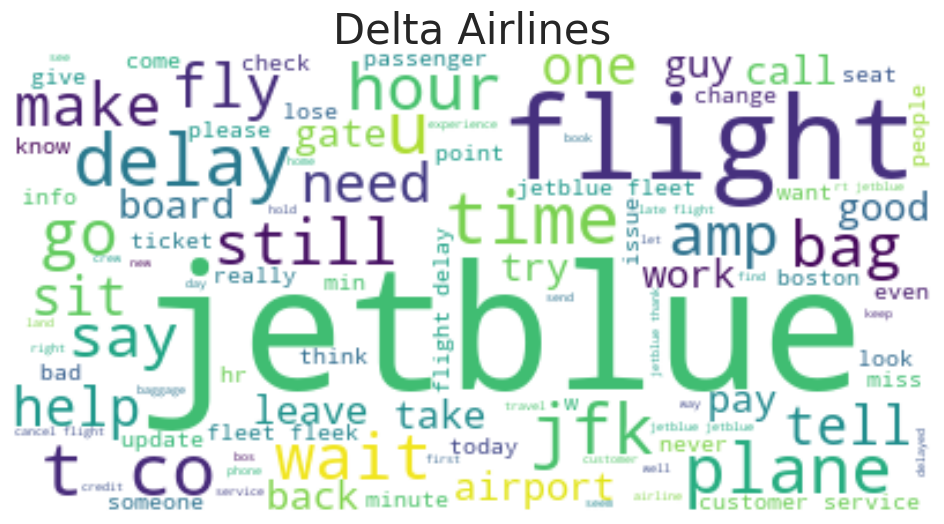

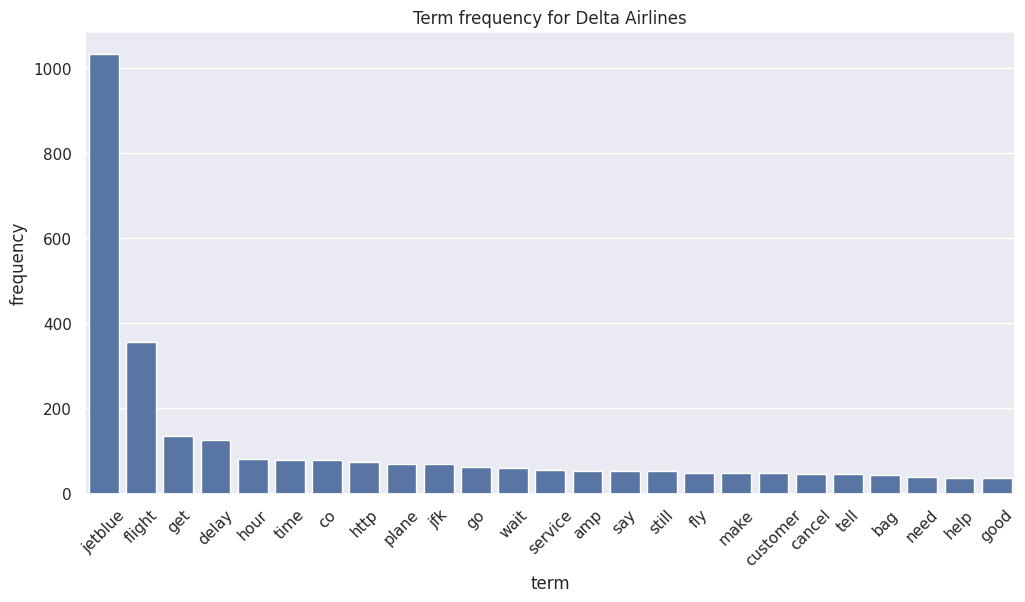

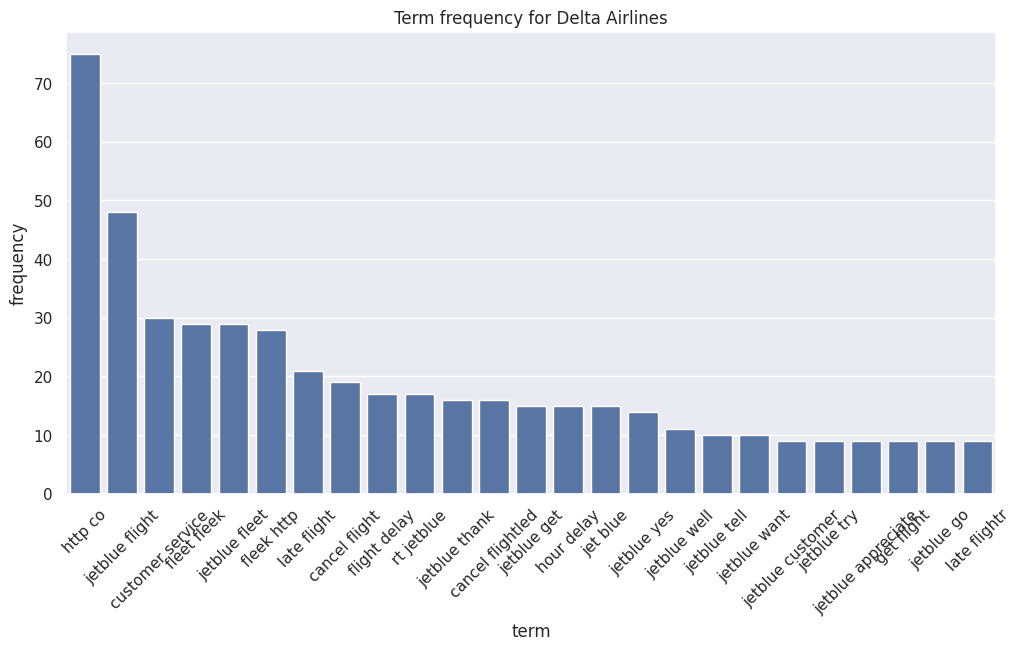

In [75]:
visualize_tweets(cleaned_tweets, airline='Delta', airline_sentiment='negative')

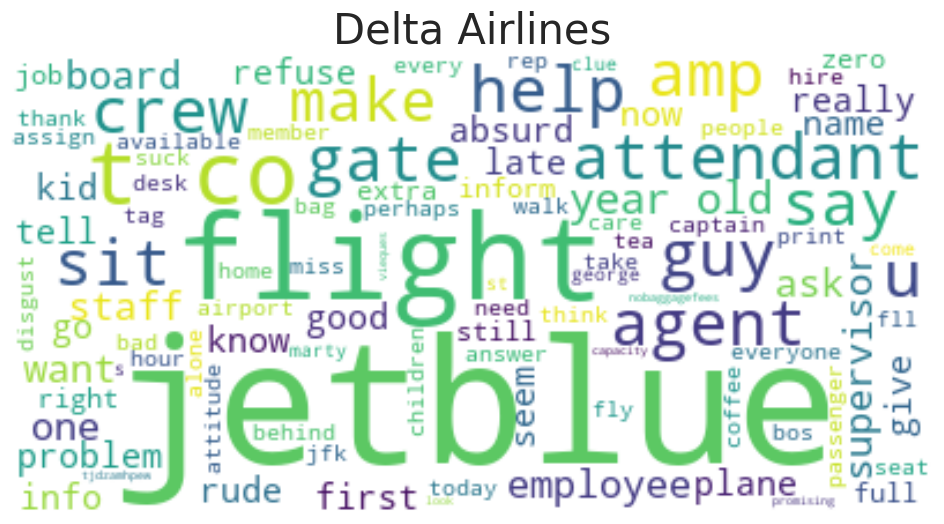

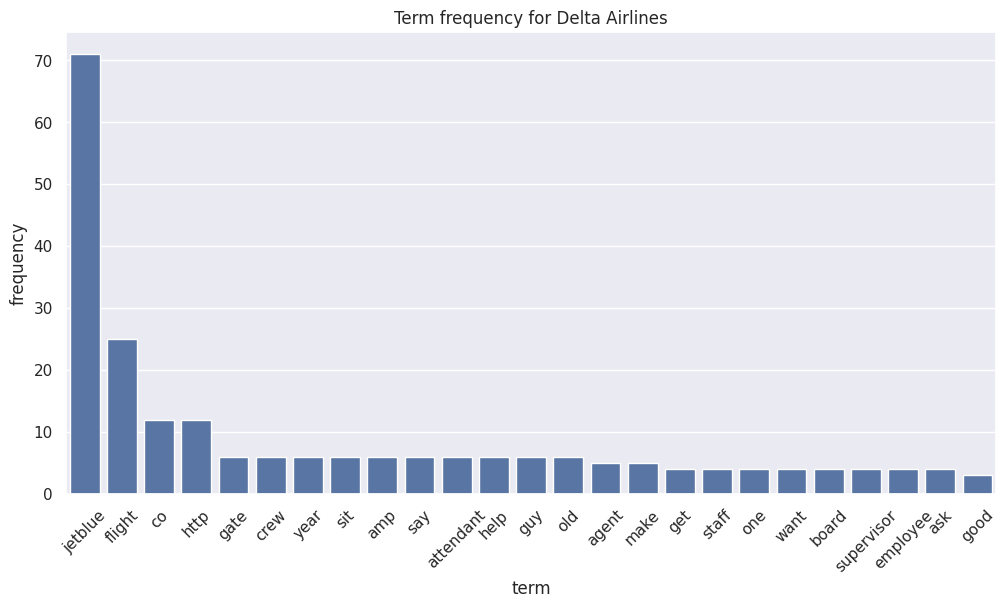

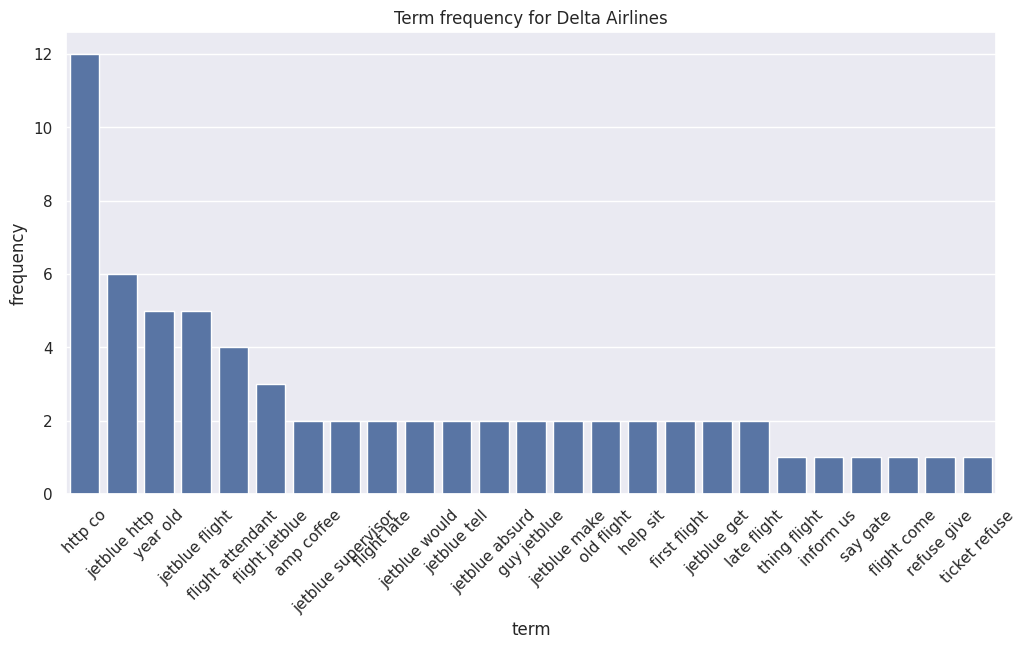

In [76]:
visualize_tweets(cleaned_tweets, airline='Delta', negativereason='Flight Attendant Complaints')

##### Topic Modeling

While term frequency-based analyses can help reveal prevalent themes in your corpus, these methods do not really account for relationships across words in the corpus. An alternative method that addresses this gap is that of topic modeling, which categorizes documents into different topics/themes based on the words that co-occur in them.

The (arguably) most popular method for topic modeling is called Latent Dirichlet Allocation or LDA. We'll be discussing the theory behind the method in another session, but we'll be implementing it in this notebook now.

The packages for implementing LDA are already pre-installed in Google Colaboratory. We now only have to install a package for visualizing LDA results.

In [91]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.3 MB/s eta 0:00:00


We now import the necessary packages. We still need `CountVectorizer` to count term frequencies. The other modules are as follows:
1.   `LatentDirichletAllocation`: module in `scikit-learn` for implementing LDA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
2.   `pyLDAvis`: package for visualizing LDA results (https://pyldavis.readthedocs.io/en/latest/)
3.   `numpy`: package for manipulating numerical matrices

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import numpy as np

For this method, we'll be using our `cleaned_tweets` dataframe.

In [78]:
cleaned_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada),@virginamerica @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica plus add commercial experience....
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada),@virginamerica today... must mean need take an...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really aggressive blast obnoxio...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really big bad thing


LDA is a method reliant on term frequency counts. So we need to start off with creating a document-term matrix again. This time, we will only include terms that appear in **at most** 95% of the documents (`max_df=0.95`) and **at least** 2 documents (`min_df=2`).

In [79]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(cleaned_tweets['cleaned_text'])

Investigating the shape of the matrix tells us that we are working with 14640 documents and 5437 words.

In [80]:
doc_term_matrix.toarray().shape

(14640, 5442)

We now insantiate an LDA object, which we instruct to identify 5 topics (`n_components=5`) for us. The `n_components` argument is always required when instantiating an LDA object because it needs to know how many topics we want to extract.

The `random_state` argument just ensures that for the parts of the algorithm that require random numbers, the RNG (random number generator) will output the same numbers no matter how many times we run the code. This ensures consistency across results. (Without this argument, we'll get slightly different results every time we run the code.)

We then fit the LDA object on our `doc_term_matrix`.

In [81]:
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

After fitting the LDA object on our `doc_term_matrix`, its components_ attribute will contain statistics relevant to the topics extracted from the matrix. The code below confirms to us that LDA was able to extract 5 topics for our topic model.

In [82]:
len(LDA.components_)

3

`LDA.components_` returns a topic term matrix for us. Each row in the matrix corresponds to a topic, while each column corresponds to a term. The numbers represent how associated a particular term is with a particular topic. The higher the number, the higher the assocation.

In [83]:
topic_term_matrix = LDA.components_
topic_term_matrix

array([[ 3.83784088,  2.11133785,  0.33365399, ...,  4.75716309,
         2.31297866,  2.15268441],
       [10.80501285, 19.55275127,  2.3244738 , ...,  4.89116441,
         0.33912736,  3.49983562],
       [ 0.35714627, 10.33591087,  0.34187221, ...,  0.3516725 ,
         0.34789398,  0.34747996]], shape=(3, 5442))

Let's investigate what terms are most associated with our first topic. First, we have to index the first row from our matrix, which refers to our first topic.

In [84]:
topic1 = topic_term_matrix[0]
topic1

array([3.83784088, 2.11133785, 0.33365399, ..., 4.75716309, 2.31297866,
       2.15268441], shape=(5442,))

We then use the `argsort()` method on `topic1` to sort the scores of the terms from lowest to highest. This outputs a list indicating the indices of the sorted terms.

The list below tells us that the 5161st word in the matrix is most associated with Topic 1 while the 1926th word is least associated with it.

In [85]:
topic1.argsort()

array([ 608, 3686, 1648, ..., 4620, 2213, 5109], shape=(5442,))

We now extract the indices of the 15 words most associated with Topic 1.

In [86]:
topic1_top_idx = topic1.argsort()[-15:]
topic1_top_idx

array([ 900, 2244, 1686,  639,  908, 4917, 1606, 1046, 4440, 5165, 4398,
       3176, 4620, 2213, 5109])

Then, we use these indices to index the words in our matrix and figure out which words are most associated with Topic 1. Based on the words most associated with this topic, what theme do you think does it relate to?

In [87]:
topic1_top = [vectorizer.get_feature_names_out()[idx] for idx in topic1_top_idx]
topic1_top

['bad',
 'fly',
 'delay',
 'airline',
 'bag',
 'ticket',
 'customer',
 'book',
 'service',
 'usairways',
 'seat',
 'make',
 'southwestair',
 'flight',
 'united']

We can then repeat the process we did for all topics in our topic model. Then, we can try to figure out how each topic differs from one another.

In [88]:
for index, topic in enumerate(LDA.components_):
  print(f'The top 15 words for topic #{index}')
  print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print('\n')

The top 15 words for topic #0
['bad', 'fly', 'delay', 'airline', 'bag', 'ticket', 'customer', 'book', 'service', 'usairways', 'seat', 'make', 'southwestair', 'flight', 'united']


The top 15 words for topic #1
['try', 'need', 'plane', 'flightled', 'delay', 'time', 'wait', 'hold', 'hour', 'help', 'cancel', 'southwestair', 'americanair', 'usairways', 'flight']


The top 15 words for topic #2
['great', 'love', 'dm', 'usairways', 'good', 'service', 'customer', 'fly', 'thanks', 'virginamerica', 'southwestair', 'thank', 'americanair', 'http', 'jetblue']




Now that we have an idea about what topics we have, we need to assign our text entries to one topic each. To do this, we need to use our `LDA` object to transform our `doc_term_matrix` to a `doc_topic_matrix`.

In this matrix, each row represents a document or text entry, while each column represents the extent to which a document or text entry belongs to a particular topic.

For the first tweet, for example, it is 73% associated with Topic 5; 6.8% associated with Topic 2; and 6.7% associated with Topics 1, 3, and 4. We can therefore infer that the first tweet falls under Topic 5.

In [89]:
doc_topic_matrix = LDA.transform(doc_term_matrix)
doc_topic_matrix

array([[0.11995162, 0.13301039, 0.74703799],
       [0.34959791, 0.05702388, 0.59337821],
       [0.56497846, 0.08931709, 0.34570445],
       ...,
       [0.07043648, 0.07263582, 0.85692769],
       [0.04921909, 0.68146428, 0.26931664],
       [0.30791947, 0.66016822, 0.03191231]], shape=(14640, 3))

We can now add a "Topic" column to our dataframe and determine the topic with the highest association for each document using the `argmax` method--which returns the index of the maximum number in a list or array.

In [90]:
cleaned_tweets['Topic'] = doc_topic_matrix.argmax(axis=1)
cleaned_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text,Topic
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada),@virginamerica @dhepburn said.,2
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica plus add commercial experience....,2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada),@virginamerica today... must mean need take an...,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really aggressive blast obnoxio...,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),@virginamerica really big bad thing,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22,NaN,NaN,@americanair thank get different flight chicago.,1
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22,Texas,NaN,@americanair leave 20 minute late flight. warn...,1
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22,"Nigeria,lagos",NaN,@americanair please bring american airline #bl...,2
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22,New Jersey,Eastern Time (US & Canada),"@americanair money, change flight, answer phon...",1


In [91]:
cleaned_tweets.loc[:, ['text', 'Topic']].to_excel('categorized_airline_tweets.xlsx')

Finally, we can visualize the topics in our topic model and the terms associated with these topics using the `pyLDAvis` module. To implement this visualization, we just need our
*   topic term matrix
*   document topic matrix
*   the length (number of words) of each document
*   list of words in the corpus
*   the frequency of each word across the entire corpus

In [92]:
vocab = vectorizer.get_feature_names_out()
doc_lengths = [len(doc) for doc in tweets['cleaned_text']]
term_freqs = doc_term_matrix.sum(axis=0)
term_freqs = np.array(term_freqs).flatten()
vis_data = pyLDAvis.prepare(topic_term_matrix, doc_topic_matrix, doc_lengths, vocab, term_freqs)

pyLDAvis.display(vis_data)

The left side of the visualization shows us the topics and their distance and relationship with each other. It tells us which topics are closely related and gives us an idea of whether or not we should change the number of topics we ask our model to extract.

The right side displays words most associated with each topic. Determining which words are most associated is affected by the relevance metric. If the metric is close to 1, association is determined by the number of words that occur most frequently in texts pertaining to a particular topic (i.e., length of the red bars). If the metric is close to 0, association is determined by which words occur almost uniquely in texts pertaining to a particular topic (i.e., proportion of red bar over blue bar).

**Think about this:** Is 5 the ideal number of topics for this situation? If not, experiment with other numbers of topics.

##### Sentiment Analysis

The last computational method we'll be looking at in this notebook is sentiment analysis. Although our original dataset already has a sentiment column within it, this is not the case all the time. Therefore, we need to find a way to automate the analysis of sentiments in text documents.

We'll be looking at two packages to accomplish this. The first is VADER. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [93]:
# download VADER lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(["vader_lexicon"])

# import and initialize our sentiment analyzer
senti = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vscode/nltk_data...


Now we can try to get the sentiment of a sample string.

In [94]:
string = "Wow, VADER NLTK is really powerful!"

senti.polarity_scores(string)

{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.8012}

The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.

Let's define the function to perform the sentiment analysis.

In [95]:
# Function to perform sentiment analysis
def sentiment_analysis(dataframe, textcolumn='cleaned_text'):
  for index, row in dataframe.iterrows():                       # iterate the rows of the dataframe
    senti_score = senti.polarity_scores(str(row[textcolumn]))   # get the sentiment scores
    dataframe.loc[index, 'neg'] = senti_score['neg']             # append the negative score
    dataframe.loc[index, 'neu'] = senti_score['neu']             # append the neutral score
    dataframe.loc[index, 'pos'] = senti_score['pos']             # append the positive score
    dataframe.loc[index, 'compound'] = senti_score['compound']   # append the compound score
  return dataframe

In [96]:
# Perform sentiment analysis on pldt tweets
airline_sentiments = sentiment_analysis(tweets, textcolumn='cleaned_text')

In [97]:
# Take a look at the sentiment scores
airline_sentiments[['text', 'neg', 'neu', 'pos', 'compound']].head()

,text,neg,neu,pos,compound
0,@VirginAmerica What @dhepburn said.,0.000,1.000,0.0,0.0000
1,@VirginAmerica plus you've added commercials t...,0.000,1.000,0.0,0.0000
2,@VirginAmerica I didn't today... Must mean I n...,0.000,1.000,0.0,0.0000
3,@VirginAmerica it's really aggressive to blast...,0.364,0.636,0.0,-0.6318
4,@VirginAmerica and it's a really big bad thing...,0.486,0.514,0.0,-0.5829


In [98]:
airline_sentiments[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,14640.000000,14640.000000,14640.000000,14640.000000
mean,0.104543,0.726587,0.168873,0.086254
std,0.144670,0.207387,0.198830,0.435744
min,0.000000,0.090000,0.000000,-0.973800
25%,0.000000,0.580000,0.000000,-0.241100
50%,0.000000,0.725000,0.124000,0.000000
75%,0.193000,0.902000,0.293000,0.438675
max,0.865000,1.000000,0.910000,0.974100


You can then use this data to perform analyses similar to the 'Sentiments across Time' analysis we already did in this notebook.

The second package we'll be looking at is the NRC Lexicon. NRC stands for National Research Council Canada. This sentiment analysis approach is a lexicon- or word-based approach that estimates sentiments related not only to positivity and neutrality but also to other emotions.

In [99]:
!pip install nrclex
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [102]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /home/vscode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [103]:
from nrclex import NRCLex

In [104]:
text = "She is happily in love with her partner."
text_object = NRCLex(text)

In [105]:
text_object.affect_frequencies

{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.6,
 'negative': 0.0,
 'sadness': 0.0,
 'disgust': 0.0,
 'joy': 0.4}

In [106]:
# Function to perform sentiment analysis
def affect_analysis(dataframe, textcolumn='cleaned_text'):
  for index, row in dataframe.iterrows():                       # iterate the rows of the dataframe
    text = str(row[textcolumn])
    text_object = NRCLex(text)
    affect_dict = text_object.affect_frequencies
    dataframe.loc[index, 'positive_affect'] = affect_dict['positive']
    dataframe.loc[index, 'negative_affect'] = affect_dict['negative']
    dataframe.loc[index, 'joy_affect'] = affect_dict['joy']
    dataframe.loc[index, 'sadness_affect'] = affect_dict['sadness']
    dataframe.loc[index, 'anger_affect'] = affect_dict['anger']
    dataframe.loc[index, 'fear_affect'] = affect_dict['fear']
    dataframe.loc[index, 'disgust_affect'] = affect_dict['disgust']
    dataframe.loc[index, 'surprise_affect'] = affect_dict['surprise']
    dataframe.loc[index, 'anticip_affect'] = affect_dict['anticip']
  return dataframe

In [107]:
airline_affects = affect_analysis(tweets)

In [108]:
columns = ['text', 'positive_affect', 'negative_affect', 'joy_affect', 'sadness_affect', 'anger_affect', 'fear_affect',
           'disgust_affect', 'surprise_affect', 'anticip_affect']
airline_affects[columns].head()

,text,positive_affect,negative_affect,joy_affect,sadness_affect,anger_affect,fear_affect,disgust_affect,surprise_affect,anticip_affect
0,@VirginAmerica What @dhepburn said.,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0
1,@VirginAmerica plus you've added commercials t...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0
2,@VirginAmerica I didn't today... Must mean I n...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,1.000,0.0
3,@VirginAmerica it's really aggressive to blast...,0.0625,0.1875,0.0625,0.0625,0.1875,0.125,0.0625,0.125,0.0
4,@VirginAmerica and it's a really big bad thing...,0.0000,0.2000,0.0000,0.2000,0.2000,0.200,0.2000,0.000,0.0


In [109]:
airline_affects[columns].describe()

,positive_affect,negative_affect,joy_affect,sadness_affect,anger_affect,fear_affect,disgust_affect,surprise_affect,anticip_affect
count,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.0
mean,0.213266,0.122633,0.038982,0.072858,0.036124,0.044514,0.028426,0.035198,0.0
std,0.249202,0.174642,0.085424,0.123008,0.076359,0.103362,0.064246,0.098212,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.162281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.333333,0.200000,0.000000,0.133333,0.000000,0.055556,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.0
